# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [24]:
import numpy as np
import math as m

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [25]:
def max_element(arr):
    zero = arr==0;
    print (arr[1:][zero[:-1]].max());
newArray=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]);
max_element(newArray);

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [26]:
def nearest_value(X, v):
    # Your code here
    deviations = np.abs(X - v)
    return X[np.where(deviations == np.min(deviations))][0]
x= np.arange(0,10).reshape((2, 5)) 
v=3.6
nearest_value(x, v )

4

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [27]:
def scale(X): 
    eps = 0.0000001
    e = np.mean(X, axis=0)
    d = np.std(X, axis=0)
    is_not_zero = np.abs(d) > eps
    X[:, is_not_zero] = (X - e)[:, is_not_zero] / d[is_not_zero]
    return X
        
X = scale(np.array([[1, 2, 0], [1, 5, 0], [2, 8, 0], [2, 3, 1]], dtype=float))
print (X)
X = scale(np.array([[1, 2, 2], [1, 5, 2], [2, 8, 2], [2, 3, 2]], dtype=float))
print (X)

[[-1.         -1.09108945 -0.57735027]
 [-1.          0.21821789 -0.57735027]
 [ 1.          1.52752523 -0.57735027]
 [ 1.         -0.65465367  1.73205081]]
[[-1.         -1.09108945  2.        ]
 [-1.          0.21821789  2.        ]
 [ 1.          1.52752523  2.        ]
 [ 1.         -0.65465367  2.        ]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [28]:
def get_stats(X):
    det = np.linalg.det(X) # определитель 
    inv = np.linalg.inv(X) # обратная матрица
    trace = np.trace(X) # след матрицы
    maxEl = np.max(X) # наибольший элемент
    minEl = np.min(X) # наименьший элемент
    norm = np.linalg.norm(X) # норма Фробениуса
    eig = np.linalg.eig(X) # собственные числа

Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [29]:
maxArr = np.zeros(100)

for exp_num in range(100):
    X1 = np.random.normal(0, 1, (10, 10))
    X2 = np.random.normal(0, 1, (10, 10))
    
    Y = X1.dot(X2)
    maxArr[exp_num] = np.max(Y)
    
print(np.mean(maxArr))
print(np.quantile(maxArr, 0.95))

8.396376871127618
12.34097713328799


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [30]:
import pandas as pd
%matplotlib inline

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [31]:
dataframe = pd.read_csv("2008.csv")

cancel = dataframe[['CancellationCode', 'Cancelled']]
cancel[cancel.Cancelled == 1].groupby('CancellationCode').count() #++

,Cancelled
CancellationCode,
A,563
B,549
C,299


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [32]:
dataframe = pd.read_csv("2008.csv")

maxDistance = dataframe[['Distance']].max()
minDistance = dataframe[['Distance']].min()
averageDistance = dataframe[['Distance']].mean()

 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [33]:
dataframe = pd.read_csv("2008.csv")

minDistance = dataframe[['Distance']].min()
distanceFrame = dataframe[dataframe.Distance == int(minDistance)][['Year','Month','DayofMonth', 'DayOfWeek', 'FlightNum']]

flightNumFrame = distanceFrame.merge(dataframe, on=["FlightNum"])[['Year_y','Month_y','DayofMonth_y', 'DayOfWeek_y', 'FlightNum', 'Distance']]

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [34]:
dataframe = pd.read_csv("2008.csv")
airportFrame = pd.read_csv("airports.csv")

dataframe.groupby('Origin').count()[['Year']].sort_values(by=['Year'], ascending=False)
airportFrame[airportFrame.iata == 'ATL']

,iata,airport,city,state,country,lat,long
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [35]:
import pandas as pd
%matplotlib inline

dataframe = pd.read_csv("2008.csv")
dataframe[['Origin','AirTime']].groupby('Origin').mean().sort_values(by=['AirTime'], ascending=False).head(1) # SJU

,AirTime
Origin,
SJU,205.2


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [36]:
import pandas as pd
%matplotlib inline

dataframe = pd.read_csv("2008.csv")
groups = dataframe[['Origin', 'DepDelay']].groupby(by=['Origin']).count().sort_values(by=['DepDelay'], ascending=False)
groups[groups.DepDelay > 1000]

,DepDelay
Origin,
ATL,4079
ORD,3391
DFW,2730
DEN,2353
LAX,2064
PHX,2011
LAS,1773
IAH,1770
DTW,1588


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения? да
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск? все
   - Сколько признаков имеют хотя бы одно пропущенное значение?

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [57]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df = pd.read_csv("2008.csv")

#df[dataframe.DepDelay != 0].info()
#df[dataframe.DepDelay != 0].isnull()
#df[dataframe.DepDelay != 0].isnull().sum()

In [58]:
df = df[np.isnan(df.DepTime)!= True]
df = df[df.DepTime != 0]

df = df[np.isnan(df.DepDelay)!= True]
df = df[df.DepDelay != 0]
df = df[np.isnan(df.CRSDepTime)!= True]
df = df[df.CRSDepTime != 0]
df = df[np.isnan(df.ArrTime)!= True]
df = df[df.ArrTime != 0]
df = df[np.isnan(df.CRSArrTime)!= True]
df = df[df.CRSArrTime != 0]

y = df[['DepDelay']]
df.drop(['Cancelled', 'CancellationCode', 'Diverted', 'DepDelay'], axis='columns', inplace=True)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [59]:
def to_hour(col):
    s = []
    for i in df[col]:
        if np.isnan(i):
            s.append(np.nan)
        else:
            if len(str(int(i))) > 2:
                s.append(int(str(int(i))[0:len(str(int(i)))-2]))
            else: s.append(0)
    df['{}_Hour'.format(col)] = s
    

def to_minute(col):
    s = []
    for i in df[col]:
        if np.isnan(i):
            s.append(np.nan)
        else:
            s.append(int(str(int(i))[len(str(int(i)))-2:]))
    df['{}_Minute'.format(col)] = s
    

to_hour('DepTime')
to_minute('DepTime')

to_hour('CRSDepTime')
to_minute('CRSDepTime')

to_hour('CRSArrTime')
to_minute('CRSArrTime')

to_hour('ArrTime')
to_minute('ArrTime')

df.drop(['DepTime', 'CRSDepTime', 'CRSArrTime', 'ArrTime'], axis='columns', inplace=True)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [60]:
#ArrDelay  - собственно логично,  позже вылетели, позже прилетим)
#Фактическое время вылета и прибытия тоже не имеет для модели значения
df.drop(['ArrDelay', 'Year', 'TailNum', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime'], axis='columns', inplace=True)
df.drop(['CRSArrTime_Hour', 'CRSArrTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute'], axis='columns', inplace=True)
df.drop(['DepTime_Minute'], axis='columns', inplace=True)
df.drop(['Month','DayofMonth','DayOfWeek', 'TaxiOut'], axis='columns', inplace=True)
#df.corr()

In [61]:
df.corr()


,FlightNum,Distance,TaxiIn,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,CRSDepTime_Hour,CRSDepTime_Minute
FlightNum,1.000000,-0.350234,-0.005973,0.076525,0.060002,0.013833,0.009387,-0.022415,-0.003909,-0.011679,-0.002678
Distance,-0.350234,1.000000,0.072517,-0.000119,-0.024372,0.014192,0.006950,-0.037445,-0.016628,-0.011692,0.014938
TaxiIn,-0.005973,0.072517,1.000000,-0.058748,0.004943,0.221044,0.000476,-0.046780,-0.046532,-0.052721,-0.013244
CarrierDelay,0.076525,-0.000119,-0.058748,1.000000,-0.039276,-0.141216,-0.013359,-0.139685,-0.015873,-0.073943,-0.020738
WeatherDelay,0.060002,-0.024372,0.004943,-0.039276,1.000000,-0.015508,-0.006283,-0.039146,0.021972,0.007648,-0.006072
NASDelay,0.013833,0.014192,0.221044,-0.141216,-0.015508,1.000000,-0.012667,-0.142288,-0.004054,-0.039952,-0.010783
SecurityDelay,0.009387,0.006950,0.000476,-0.013359,-0.006283,-0.012667,1.000000,-0.013749,-0.007682,-0.012255,-0.011749
LateAircraftDelay,-0.022415,-0.037445,-0.046780,-0.139685,-0.039146,-0.142288,-0.013749,1.000000,0.205894,0.194631,0.029836
DepTime_Hour,-0.003909,-0.016628,-0.046532,-0.015873,0.021972,-0.004054,-0.007682,0.205894,1.000000,0.959687,0.088738
CRSDepTime_Hour,-0.011679,-0.011692,-0.052721,-0.073943,0.007648,-0.039952,-0.012255,0.194631,0.959687,1.000000,0.047894


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

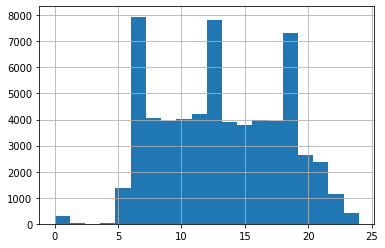

In [62]:
df['DepTime_Hour'].hist(bins=20)

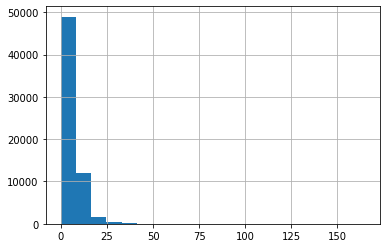

In [63]:
df['TaxiIn'].hist(bins=20)

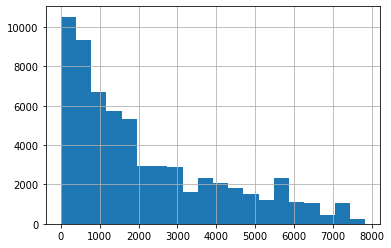

In [64]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [65]:
from sklearn.preprocessing import StandardScaler
    
def missing_data_fill(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].fillna('nan')
        else:
            df[i] = df[i].fillna(0)
                        
def transform_data(df):
    data = df
    missing_data_fill(data)
    data = pd.get_dummies(data)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data)
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [66]:
data = transform_data(df)
data.shape

(63264, 625)

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [67]:
from sklearn.model_selection import train_test_split

X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train
lr = LinearRegression().fit(X_train.head(1000), y_train.head(1000))
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

train_predict = lr.predict(X_train)
trainMSE = mean_squared_error(y_train, train_predict)

test_predict = lr.predict(X_test)
testMSE = mean_squared_error(y_test, test_predict)

print("Среднеквадратическая ошибка на обучающем наборе:", trainMSE)
print("Среднеквадратическая ошибка на тестовом наборе:", testMSE)

Правильность на обучающем наборе: -178839128062184260632576.00
Правильность на тестовом наборе: -160065269828678523551744.00
Среднеквадратическая ошибка на обучающем наборе: 2.3862491604869425e+26
Среднеквадратическая ошибка на тестовом наборе: 1.8714705201972393e+26


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [69]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge(alpha=0.7).fit(X_train.head(1000), y_train.head(1000))

print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train))) # 0.72
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test))) # 0.70

lasso = Lasso().fit(X_train.head(1000), y_train.head(1000))

print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train))) # 0.88
print(lr.coef_)
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test))) # 0.88
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0))) # 92
predictCoef = lr.predict(X_test)
print(predictCoef)

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.88
Правильность на обучающем наборе: 0.89
[[-2.67544174e-01  2.92696312e-01 -9.06146423e-01  2.06299348e+01
   8.77719282e+00  7.49412069e+00  8.64383257e-01  2.09481605e+01
   1.88252831e+00 -1.94933292e-01 -1.26233261e-01  9.11952725e+10
   1.31651489e+11  1.59653014e+10  6.99465396e+10  7.97918288e+10
   9.55751584e+10  1.17232915e+11  9.36813902e+10  5.63865873e+10
   8.98588457e+10  4.44749694e+10  1.19755471e+11  1.04416116e+11
   6.42550412e+10  1.27555904e+11  1.17722661e+11  1.18299128e+11
   1.76150674e+11  1.04924511e+11  8.25800429e+10  1.00029664e+12
   1.67971808e+10  6.22612093e+10  8.55405821e+09 -4.62106613e+12
  -1.65213437e+12 -1.29053132e+12 -1.02875684e+12  1.33628339e+12
   7.91958162e+09  1.85691011e+10 -5.07943316e+11  2.13256227e+12
  -2.35286102e+11 -2.65241879e+11  2.72290536e+10  4.61063722e+10
   2.16819807e+10  1.92496212e+11  3.20919729e+12  7.06419137e+10
   2.01857834e+10 -1.86636

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [70]:
X_train['X0']= 1
X_test['X0'] = 1

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [94]:
import numpy as np
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    predicted = w.dot(X.T)
    return predicted

In [95]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    loss = np.mean(np.square(((y - (X * w.T)) / y)))
    return loss

In [119]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    return X * ((X * w) - y)

In [116]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    loss = np.mean(np.square(((y - (X * w.T)) / y)) + np.linalg.norm(w))
    return loss

In [117]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return X.T.dot(X.T.dot(w) - y)

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [112]:
def grad_descent(X, y, max_iter, eps, is_reg):
    theta = np.random.randn(np.size(y),1)
    
    for iteration in range(max_iter):
        prevIter = theta
        gradients = get_grad(theta.T, X, y)
        theta = theta - eps * gradients      
        if (np.linalg.norm(prevIter) - np.linalg.norm(theta)) < eps:
            break
    return theta

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [146]:
print(X_train.shape)
print(y_train.shape)

w = np.random.rand(np.size(y_train),1)
#print(w.shape)

print(X_train.dot(w.T))

#grad_descent(X_train, y_train, 1000, 0.1, 0)

(47448, 626)
(47448, 1)


ValueError: Dot product shape mismatch, (47448, 626) vs (1, 47448)

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
grad_descent(X_train, y, 1000, 0.1, 1)

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, max_iter, eps):
    def learning_schedule(t):
    return t0 / (t + tl)

def sgd(X, y, w, step_size, max_iter, eps, is_reg):
    theta = np.random.randn(np.size(y),1)
    m = 100
    for epoch in range(max_iter):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = get_grad(theta, xi, yi)
            step_size = learning_schedule(epoch * m + i)
            theta = theta - step_size * gradients
    return theta   

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
sgd(X_train, y, 1000, 0.1)

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
lr = LinearRegression().fit(X_train, y)

predict = lr.predict(X_train)
MSE = mean_squared_error(y, predict)

print("Среднеквадратическая ошибка:", MSE)

Здесь вы можете поделиться своими мыслями по поводу этого задания.

Следующие книги будут отличным(минимально необходимым) материалом для понимания и успешного выполнения данной работы:
- Траск Эндрю - Грокаем глубокое обучение https://www.ozon.ru/context/detail/id/155266079/;
- Жерон Орельен - Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow https://www.ozon.ru/context/detail/id/144106127/.

А здесь — вставить вашу любимую картинку.

<img src = "https://i.gifer.com/qFs.gif">